# Study Performance

<div><h1>Problem Statement:</h1>
<p>This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.</p>
<h1>Content</h1>
<p>This data set consists of the marks secured by the students in various subjects.</p>
<ul>
<li>gender: sex of students -&gt; (Male/female)</li>
<li>race/ethnicity : ethnicity of students -&gt; (Group A, B,C, D,E)</li>
<li>parental level of education : parents' final education -&gt;(bachelor's degree,some college,master's degree,associate's degree,- high school)</li>
<li>lunch : having lunch before test (standard or free/reduced)</li>
<li>test preparation course : complete or not complete before test</li>
<li>math score</li>
<li>reading score</li>
<li>writing score</li>
</ul>
<h1>Inspiration:</h1>
<p>To understand the influence of the parent's background, test preparation etc on students' performance</p></div>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('study_performance.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [7]:
df_cat = df.drop(columns={'math_score','reading_score','writing_score','average_score'})

In [8]:
for i in df_cat:
    print('\n\nScores by: '+i)
    display(df.groupby(i).mean())



Scores by: gender


,math_score,reading_score,writing_score,average_score
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483




Scores by: race_ethnicity


,math_score,reading_score,writing_score,average_score
race_ethnicity,,,,
group A,61.629213,64.674157,62.674157,62.992509
group B,63.452632,67.352632,65.600000,65.468421
group C,64.463950,69.103448,67.827586,67.131661
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752381




Scores by: parental_level_of_education


,math_score,reading_score,writing_score,average_score
parental_level_of_education,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007




Scores by: lunch


,math_score,reading_score,writing_score,average_score
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209




Scores by: test_preparation_course


,math_score,reading_score,writing_score,average_score
test_preparation_course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


In [9]:
def plot(df_cat, palette=["#FF5733", "#33FF57", "#3366FF", "#FF33E9", "#FFFF33"]):
    fig, ax = plt.subplots(len(df_cat.columns), 1, figsize=(10,24), gridspec_kw={'hspace': 0.4})
    
    pos = 0
    for i in df_cat.columns:
        sns.boxplot(df, y='average_score', x=i, ax=ax[pos], palette=palette)
        pos += 1
        
    plt.show()

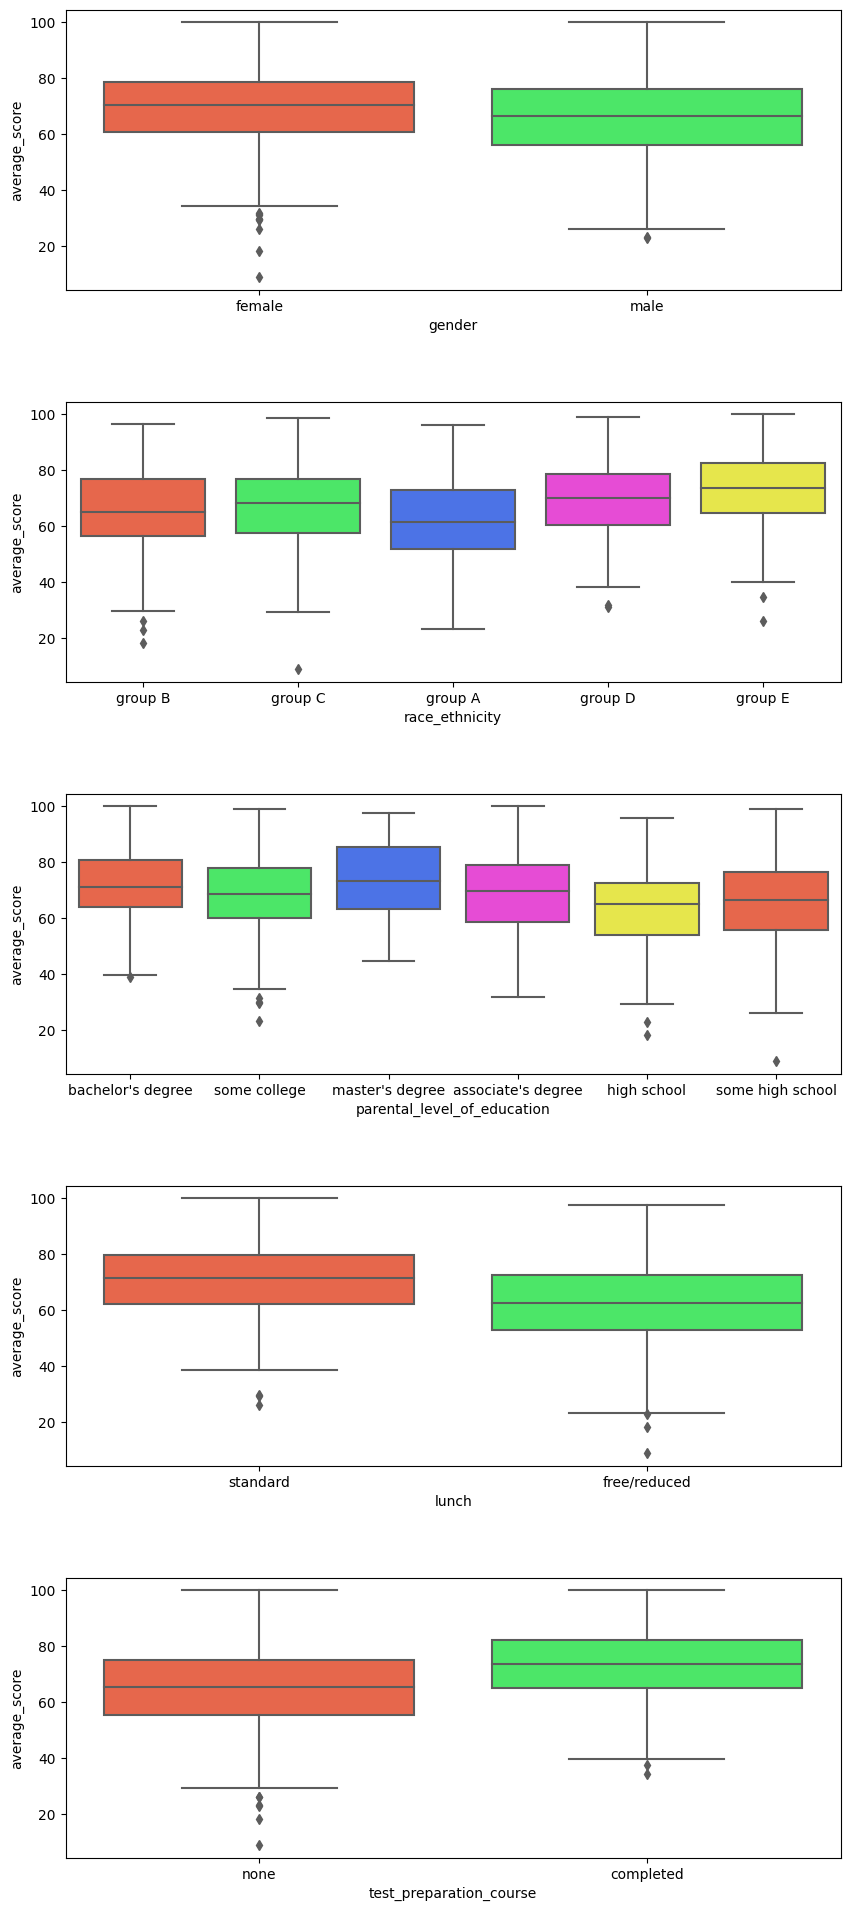

In [10]:
plot(df_cat)

In [11]:
for i in df.drop(columns={'math_score','reading_score','writing_score','average_score'}):
    print(i)
    print(str(i) + ': ' + df[i].unique())
    print('-'*20)

gender
['gender: female' 'gender: male']
--------------------
race_ethnicity
['race_ethnicity: group B' 'race_ethnicity: group C'
 'race_ethnicity: group A' 'race_ethnicity: group D'
 'race_ethnicity: group E']
--------------------
parental_level_of_education
["parental_level_of_education: bachelor's degree"
 'parental_level_of_education: some college'
 "parental_level_of_education: master's degree"
 "parental_level_of_education: associate's degree"
 'parental_level_of_education: high school'
 'parental_level_of_education: some high school']
--------------------
lunch
['lunch: standard' 'lunch: free/reduced']
--------------------
test_preparation_course
['test_preparation_course: none' 'test_preparation_course: completed']
--------------------


In [12]:
df_ml = df

df_ml.parental_level_of_education.replace({
    'some high school':1,
    'high school':2,
    'some college':3,
    "associate's degree":4,
    "bachelor's degree":5,
    "master's degree":6
}, inplace=True)

df_ml.lunch.replace({
    'standard':1,
    'free/reduced':0
}, inplace=True)

df_ml.test_preparation_course.replace({
    'none':0,
    'completed':1
}, inplace=True)

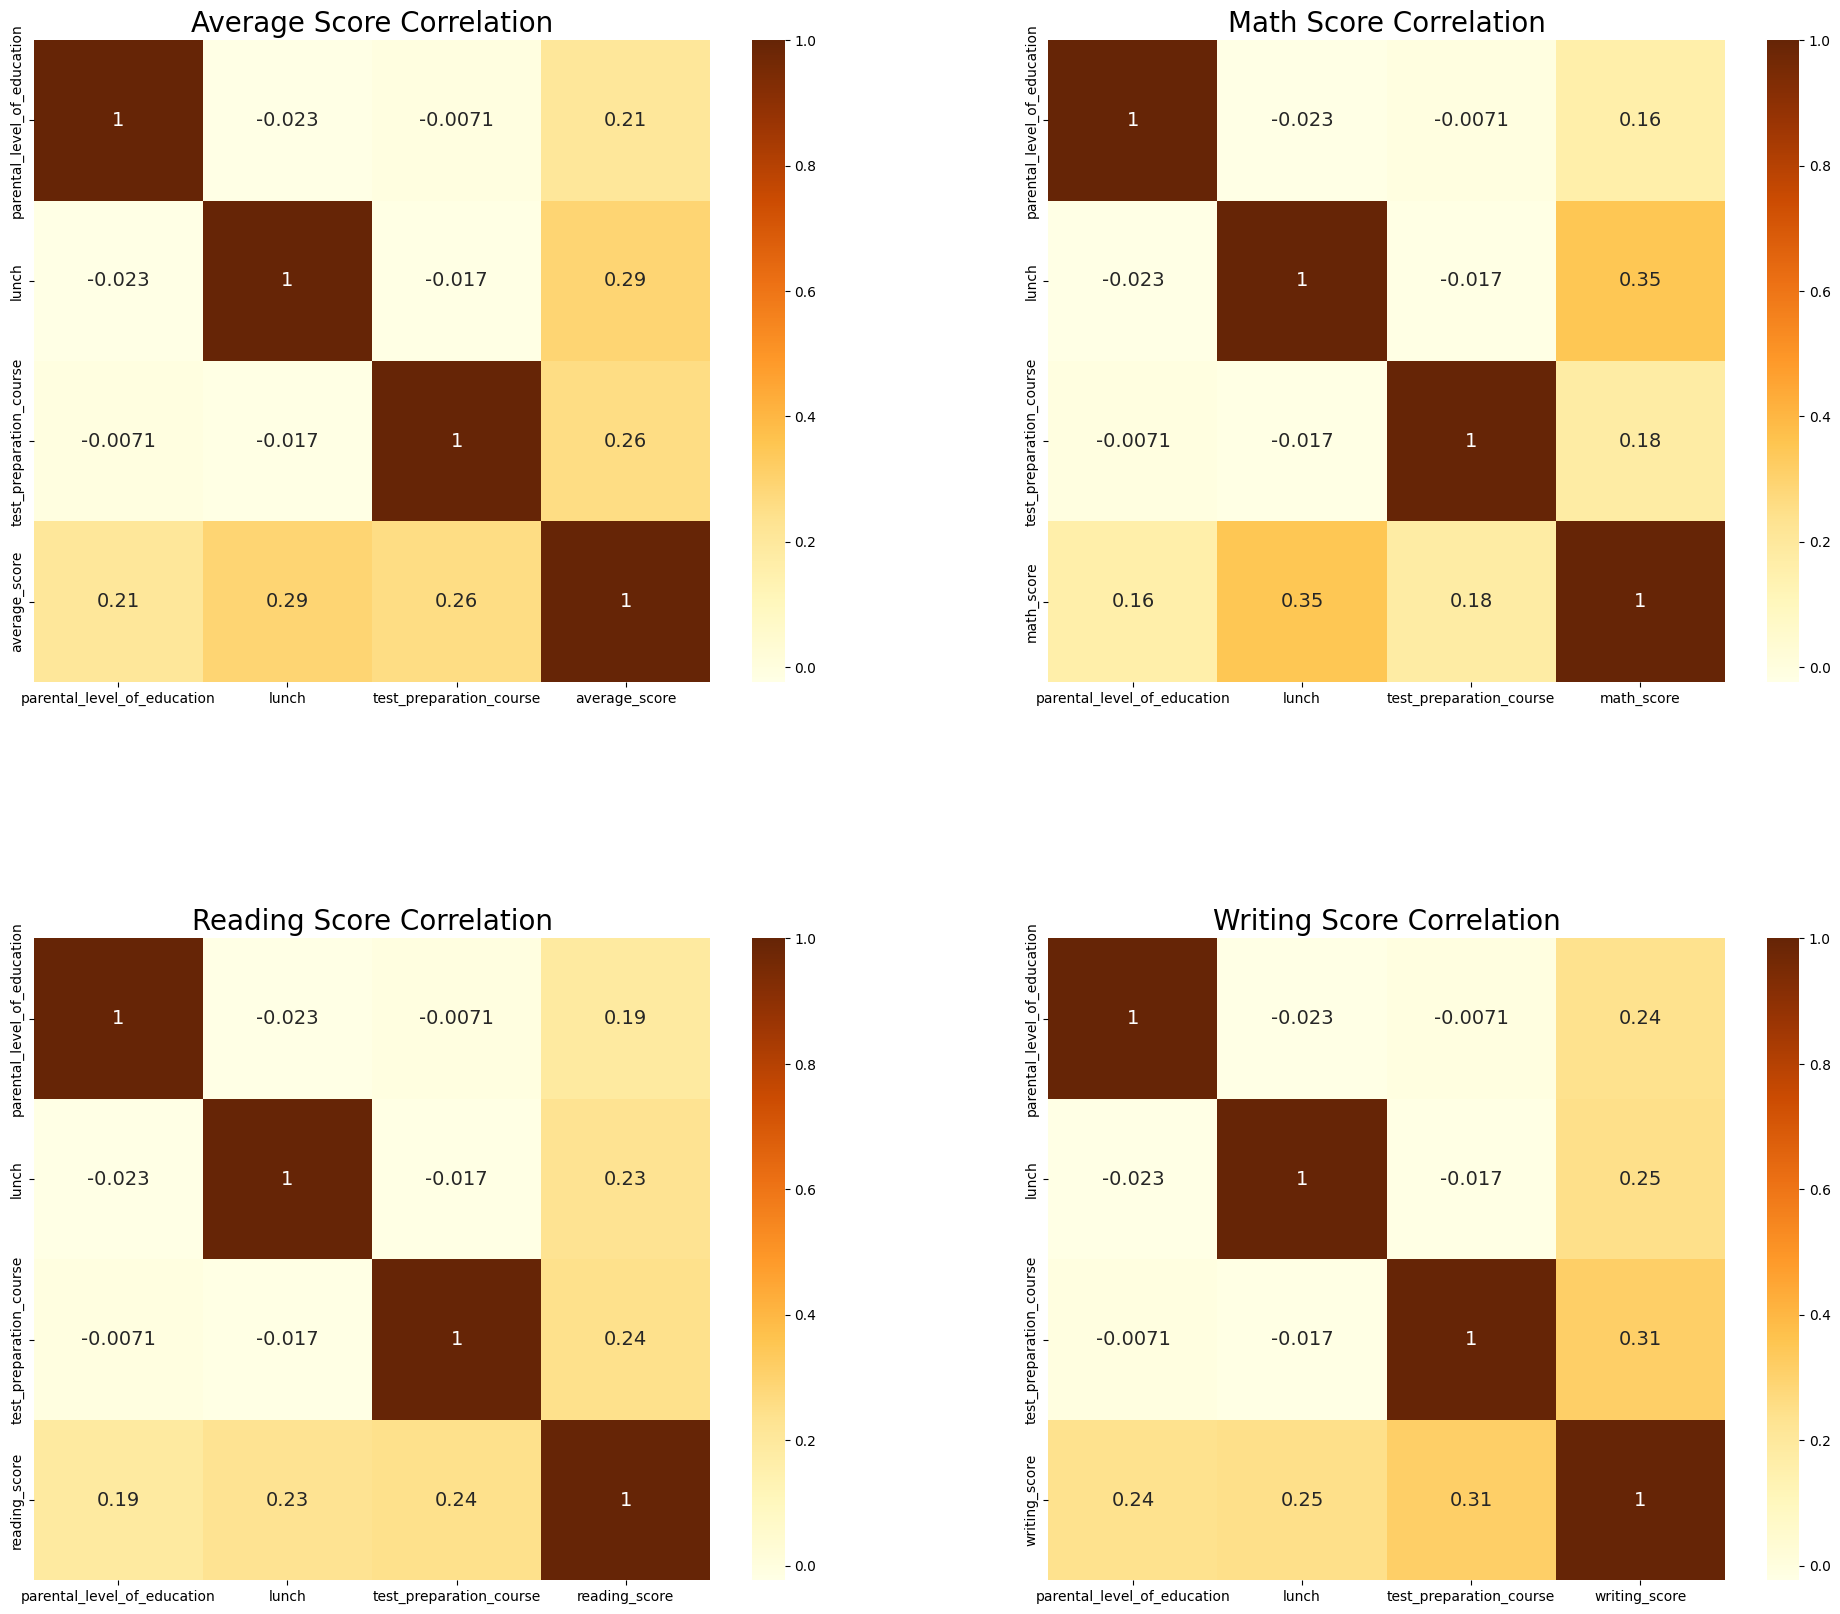

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(24,20), gridspec_kw={'hspace': 0.4})
sns.heatmap(df_ml.drop(columns={'math_score','reading_score','writing_score'}).corr(), ax=ax[0][0], annot=True, annot_kws={"size": 14}, cmap='YlOrBr').set_title('Average Score Correlation', fontsize=20)
sns.heatmap(df_ml.drop(columns={'average_score','reading_score','writing_score'}).corr(), ax=ax[0][1], annot=True, annot_kws={"size": 14}, cmap='YlOrBr').set_title('Math Score Correlation', fontsize=20)
sns.heatmap(df_ml.drop(columns={'average_score','math_score','writing_score'}).corr(), ax=ax[1][0], annot=True, annot_kws={"size": 14}, cmap='YlOrBr').set_title('Reading Score Correlation', fontsize=20)
sns.heatmap(df_ml.drop(columns={'reading_score','math_score','average_score'}).corr(), ax=ax[1][1], annot=True, annot_kws={"size": 14}, cmap='YlOrBr').set_title('Writing Score Correlation', fontsize=20)
plt.show()